In [9]:
%matplotlib inline

In [21]:
import numpy as np
import logging
import sys

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from moopt.scalarization_interface import scalar_interface, single_interface, w_interface
from moopt.monise import monise

from main_xsquared import xsquared

## Optimizing problem 

In [19]:
def runMONISE(d, node_gap=0.0, node_tlimit=float('inf')):
    wscalar_ = sscalar_ = xsquared(d)
    
    moo_ = monise(weightedScalar = wscalar_, singleScalar = sscalar_, targetGap=0.000, targetSize=100, 
                 redFact=float('inf'), smoothCount=None, nodeTimeLimit=node_tlimit, nodeGap= node_gap)
    moo_.optimize()
    objs = np.array([s.objs for s in moo_.solutionsList])
    imps = moo_.importances
    
    return objs, imps

In [20]:
M = 3
d = np.ones(M)
d = d/d.max()

objs, imps = runMONISE(d)

DEBUG:moopt.monise:Finding 1th individual minima
DEBUG:moopt.monise:Finding 2th individual minima
DEBUG:moopt.monise:Finding 3th individual minima
INFO:moopt.monise:4th solution - importance: 1.0
INFO:moopt.monise:5th solution - importance: 0.6666666566666667
INFO:moopt.monise:6th solution - importance: 0.6666666566666667
INFO:moopt.monise:7th solution - importance: 0.6666666566666667
INFO:moopt.monise:8th solution - importance: 0.2314525188427374
INFO:moopt.monise:9th solution - importance: 0.2314525188427374
INFO:moopt.monise:10th solution - importance: 0.2314525188427374
INFO:moopt.monise:11th solution - importance: 0.18184144409079278
INFO:moopt.monise:12th solution - importance: 0.16880690915596547
INFO:moopt.monise:13th solution - importance: 0.1442585542787072
INFO:moopt.monise:14th solution - importance: 0.1442585542787072
INFO:moopt.monise:15th solution - importance: 0.12172010339139948
INFO:moopt.monise:16th solution - importance: 0.10325342198373288
INFO:moopt.monise:17th so

## Plotting Pareto front views

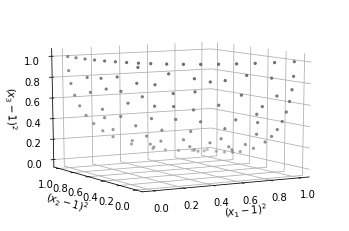

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.scatter(objs[:,0], objs[:,1], objs[:,2], c='dimgrey', marker='.')#, c=c, marker=m)
ax.set_xlabel(r'$(x_1-1)^2$')
ax.set_ylabel(r'$(x_2-1)^2$')
ax.set_zlabel(r'$(x_3-1)^2$')

ax.view_init(10, -120)
plt.show()

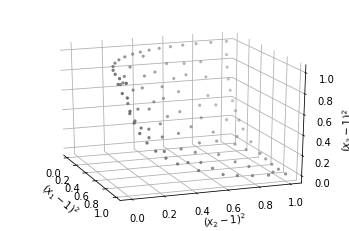

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.scatter(objs[:,0], objs[:,1], objs[:,2], c='dimgrey', marker='.')#, c=c, marker=m)
ax.set_xlabel(r'$(x_1-1)^2$')
ax.set_ylabel(r'$(x_2-1)^2$')
ax.set_zlabel(r'$(x_3-1)^2$')

ax.view_init(20, -20)
plt.show()

## Ploting convergence

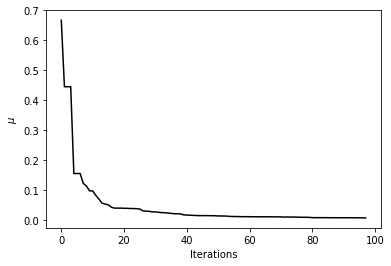

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=False)
plt.plot([i for i in range(len(imps))],imps, c='k')
plt.xlabel('Iterations')
plt.ylabel(r'$\mu$')
plt.show()